In [1]:
import numpy as np
import argparse
import cv2

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

https://www.pyimagesearch.com/2014/10/20/finding-shapes-images-using-python-opencv/

In [2]:
# construct the argument parse and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", help = "path to the image file")
#args = vars(ap.parse_args())


In [3]:
# load the image
image = cv2.imread("shapes.png")
image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

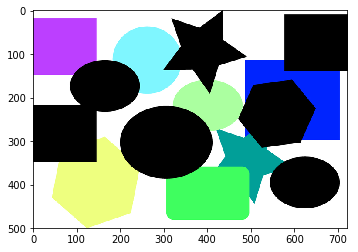

In [4]:
plt.imshow(image)

In [5]:
# find all the black shapes in the image

# define lower and upper boundary points in BGR (OpenCV stores images in BGR)
lower = np.array([0,0,0])  # pure black
upper = np.array([15,15,15])  # dark shade of gray
shapemask = cv2.inRange(image, lower, upper)  # find all pixels in range

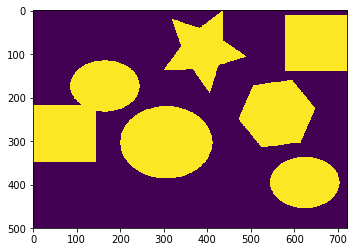

In [6]:
plt.imshow(shapemask)

In [7]:
# find all the EXTERNAL contours of the shapes (ie the boundaries) 
(_, cnts, _) = cv2.findContours(shapemask, cv2.RETR_EXTERNAL, 
                                cv2.CHAIN_APPROX_SIMPLE)
print("I found %d black shapes" % (len(cnts)))

I found 6 black shapes


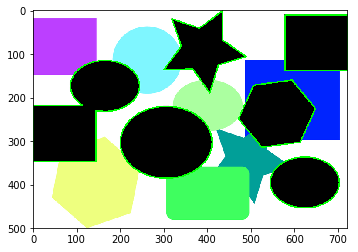

In [8]:
# loop over the contours
for c in cnts:
    # draw the contour and show it
    cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
    plt.imshow(image)

In [15]:
def find_black_shapes(image):
    # define lower and upper boundary points in BGR (OpenCV stores images in BGR)
    lower = np.array([0,0,0])  # pure black
    upper = np.array([15,15,15])  # dark shade of gray
    shapemask = cv2.inRange(image, lower, upper)  # find all pixels in range
    
    # find all the EXTERNAL contours of the shapes (ie the boundaries) 
    (_, cnts, _) = cv2.findContours(shapemask, cv2.RETR_EXTERNAL, 
                                cv2.CHAIN_APPROX_SIMPLE)
    print("I found %d black shapes" % (len(cnts)))
    
    # loop over the contours
    for c in cnts:
        # draw the contour and show it
        cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
    plt.imshow(image)

In [18]:
def find_white_shapes(image):
    # define lower and upper boundary points in BGR (OpenCV stores images in BGR)
    lower = np.array([250,250,250])  # pure black
    upper = np.array([255,255,255])  # dark shade of gray
    shapemask = cv2.inRange(image, lower, upper)  # find all pixels in range
    
    # find all the EXTERNAL contours of the shapes (ie the boundaries) 
    (_, cnts, _) = cv2.findContours(shapemask, cv2.RETR_EXTERNAL, 
                                cv2.CHAIN_APPROX_SIMPLE)
    print("I found %d white shapes" % (len(cnts)))
    
    # loop over the contours
    for c in cnts:
        # draw the contour and show it
        cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
    plt.imshow(image)

In [9]:
# Making a function that will take image and threshold it
def threshold (imageArray):
    balanceAr = []
    newAr = imageArray
    for eachRow in imageArray:
        for eachPix in eachRow:
            avgNum = mean(eachPix[:3])
            balanceAr.append(avgNum)
            
            balance = mean(balanceAr)
    for eachRow in newAr:
        for eachPix in eachRow:
            if mean(eachPix[:3]) > balance:
                eachPix[0] = 255
                eachPix[1] = 255
                eachPix[2] = 255
                eachPix[3] = 255
            else:
                eachPix[0] = 0
                eachPix[1] = 0
                eachPix[2] = 0
                eachPix[3] = 255
    return newAr

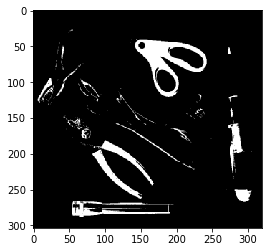

In [13]:
scissors = cv2.imread("scissors.jpg")
plt.imshow(scissors)

I found 18 white shapes


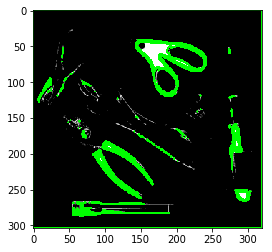

In [19]:
find_white_shapes(scissors)